In [1]:
import openai
import os
openai.api_key = 'Enter-API-Key'

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

# Tree of Thoughts (ToT)

ToT maintains a tree of thoughts, where thoughts represent coherent language sequences that serve as intermediate steps toward solving a problem. This approach enables an LM to self-evaluate the progress intermediate thoughts make towards solving a problem through a deliberate reasoning process. The LM ability to generate and evaluate thoughts is then combined with search algorithms (e.g., breadth-first search and depth-first search) to enable systematic exploration of thoughts with lookahead and backtracking.

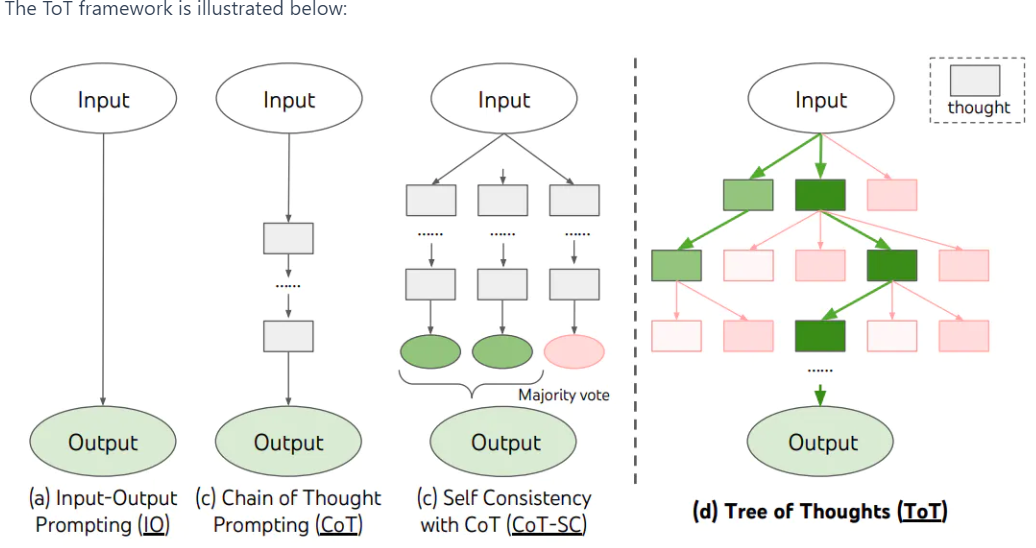

In [7]:
prompt = """
Input: 4,8,12,16
Possible next step 
"""

response = get_completion(prompt)
print(response)

20


In [8]:
prompt = """
Input: 4,9,10,13
Possible next step 
"""

response = get_completion(prompt)
print(response)

It depends on the context or purpose of the sequence. Here are some possible next steps:

- If the sequence is a list of numbers in ascending order, the next number could be 14, 15, or any larger number.
- If the sequence is a list of ages, the next number could be 14, 19, 20, or any other age that follows the pattern.
- If the sequence is a list of scores in a game, the next number could be any value depending on the rules of the game and the performance of the players.
- If the sequence is a list of coordinates in a graph, the next point could be any point that follows a logical path or curve based on the previous points.


# Retrieval Augmented Generation (RAG)

General-purpose language models can be fine-tuned to achieve several common tasks such as sentiment analysis and named entity recognition. These tasks generally don't require additional background knowledge.

For more complex and knowledge-intensive tasks, it's possible to build a language model-based system that accesses external knowledge sources to complete tasks. This enables more factual consistency, improves reliability of the generated responses, and helps to mitigate the problem of "hallucination".

RAG takes an input and retrieves a set of relevant/supporting documents given a source (e.g., Wikipedia). The documents are concatenated as context with the original input prompt and fed to the text generator which produces the final output. This makes RAG adaptive for situations where facts could evolve over time. This is very useful as LLMs's parametric knowledge is static. RAG allows language models to bypass retraining, enabling access to the latest information for generating reliable outputs via retrieval-based generation.

# Automatic Reasoning and Tool-use (ART)

Combining CoT prompting and tools in an interleaved manner has shown to be a strong and robust approach to address many tasks with LLMs. These approaches typically require hand-crafting task-specific demonstrations and carefully scripted interleaving of model generations with tool use. Paranjape et al., (2023)(opens in a new tab) propose a new framework that uses a frozen LLM to automatically generate intermediate reasoning steps as a program.

ART works as follows:

given a new task, it select demonstrations of multi-step reasoning and tool use from a task library
at test time, it pauses generation whenever external tools are called, and integrate their output before resuming generation
ART encourages the model to generalize from demonstrations to decompose a new task and use tools in appropriate places, in a zero-shot fashion. In addition, ART is extensible as it also enables humans to fix mistakes in the reasoning steps or add new tools by simply updating the task and tool libraries. The process is demonstrated below:

In [10]:
prompt = """
Task: Arithmetic
Input: Viola bought 167 books and Nancy bought 137 books then 167-137 = 30 left.
Q1:[gen code] Write arithmatic as python code
Q2:[exec code] Execute code
Q3:[EOQ]
"""

response = get_completion(prompt)
print(response)

Q1: 

books_bought_by_viola = 167
books_bought_by_nancy = 137
books_left = books_bought_by_viola - books_bought_by_nancy

Q2: 

books_bought_by_viola = 167
books_bought_by_nancy = 137
books_left = books_bought_by_viola - books_bought_by_nancy

print("Books left: ", books_left)

Q3: 

Books left: 30


# Automatic Prompt Engineer (APE)

Zhou et al., (2022)(opens in a new tab) propose automatic prompt engineer (APE) a framework for automatic instruction generation and selection. The instruction generation problem is framed as natural language synthesis addressed as a black-box optimization problem using LLMs to generate and search over candidate solutions.

The first step involves a large language model (as an inference model) that is given output demonstrations to generate instruction candidates for a task. These candidate solutions will guide the search procedure. The instructions are executed using a target model, and then the most appropriate instruction is selected based on computed evaluation scores.

APE discovers a better zero-shot CoT prompt than the human engineered "Let's think step by step" prompt (Kojima et al., 2022(opens in a new tab)).

The prompt "Let's work this out in a step by step way to be sure we have the right answer." elicits chain-of-though reasoning and improves performance on the MultiArith and GSM8K benchmarks:

In [11]:
prompt = """
Q: 4,9,10,13
A: Let's think step by step
"""

response = get_completion(prompt)
print(response)

- The difference between 4 and 9 is 5
- The difference between 9 and 10 is 1
- The difference between 10 and 13 is 3
- So the pattern seems to be adding 5, then 1, then 3
- Using this pattern, the next number would be 13 + 5 = 18
- Then 18 + 1 = 19
- And finally 19 + 3 = 22
- Therefore, the next three numbers in the sequence are 18, 19, and 22.


# Active-Prompt

Chain-of-thought (CoT) methods rely on a fixed set of human-annotated exemplars. The problem with this is that the exemplars might not be the most effective examples for the different tasks. To address this, Diao et al., (2023)(opens in a new tab) recently proposed a new prompting approach called Active-Prompt to adapt LLMs to different task-specific example prompts (annotated with human-designed CoT reasoning).

Below is an illustration of the approach. The first step is to query the LLM with or without a few CoT examples. k possible answers are generated for a set of training questions. An uncertainty metric is calculated based on the k answers (disagreement used). The most uncertain questions are selected for annotation by humans. The new annotated exemplars are then used to infer each question.

# Directional Stimulus Prompting

In [12]:
prompt = """
Article: (CNN) For the first time in eight years, a TV legend returned to doing what he does best. Contestants told to "come on down!"
on the April 1 edition of "The Price is Right" encountered not host Drew Carey  but another familiar face in charge of the proceeding.
Instead, there was Bob Barker, who hosted the TV game show for 35 years before stepping down in 2007. Looking spry at 91. Barker handled
the price-guessing game of the show, the classic "Lucky Seven" before turning hosting duties over to Carey, who finished up. Despite
being away from the show for most of the past eight years, Barker didn't seem to miss a beat.

Q: Summarize the above article briefly in 2-3 sentence
"""
#standard prompt
response = get_completion(prompt)
print(response)

Bob Barker, who hosted "The Price is Right" for 35 years before stepping down in 2007, returned to the show on April 1 to handle the price-guessing game "Lucky Seven." Despite being away from the show for most of the past eight years, Barker didn't seem to miss a beat.


In [13]:
prompt = """
Article: (CNN) For the first time in eight years, a TV legend returned to doing what he does best. Contestants told to "come on down!"
on the April 1 edition of "The Price is Right" encountered not host Drew Carey  but another familiar face in charge of the proceeding.
Instead, there was Bob Barker, who hosted the TV game show for 35 years before stepping down in 2007. Looking spry at 91. Barker handled
the price-guessing game of the show, the classic "Lucky Seven" before turning hosting duties over to Carey, who finished up. Despite
being away from the show for most of the past eight years, Barker didn't seem to miss a beat.

Q: Summarize the above article briefly in 2-3 sentences based on the hint.
Hint: Bob Barker;TV;April 1;The Price is Right;2007;91.
"""
#Directional Stimulus Prompting
response = get_completion(prompt)
print(response)

Bob Barker, the former host of "The Price is Right," returned to the show on April 1, 2015, for the first time in eight years. At 91 years old, Barker hosted the price-guessing game "Lucky Seven" before turning the hosting duties over to current host Drew Carey.


# ReAct Prompting

The ReAct framework can allow LLMs to interact with external tools to retrieve additional information that leads to more reliable and factual responses.

Results show that ReAct can outperform several state-of-the-art baselines on language and decision-making tasks. ReAct also leads to improved human interpretability and trustworthiness of LLMs. Overall, the authors found that best approach uses ReAct combined with chain-of-thought (CoT) that allows use of both internal knowledge and external information obtained during reasoning

ReAct is a general paradigm that combines reasoning and acting with LLMs. ReAct prompts LLMs to generate verbal reasoning traces and actions for a task. This allows the system to perform dynamic reasoning to create, maintain, and adjust plans for acting while also enabling interaction to external environments (e.g., Wikipedia) to incorporate additional information into the reasoning.

In [14]:
prompt = """
Question What is the elevation range for the area that the eastern sector of the
Colorado orogeny extends into?
Thought 1 I need to search Colorado orogeny, find the area that the eastern sector
of the Colorado orogeny extends into, then find the elevation range of the
area.
Action 1 Search[Colorado orogeny]
Observation 1 The Colorado orogeny was an episode of mountain building (an orogeny) in
Colorado and surrounding areas.
Thought 2 It does not mention the eastern sector. So I need to look up eastern
sector.
Action 2 Lookup[eastern sector]
Observation 2 (Result 1 / 1) The eastern sector extends into the High Plains and is called
the Central Plains orogeny.
Thought 3 The eastern sector of Colorado orogeny extends into the High Plains. So I
need to search High Plains and find its elevation range.
Action 3 Search[High Plains]
Observation 3 High Plains refers to one of two distinct land regions
Thought 4 I need to instead search High Plains (United States).
Action 4 Search[High Plains (United States)]
Observation 4 The High Plains are a subregion of the Great Plains. From east to west, the
High Plains rise in elevation from around 1,800 to 7,000 ft (550 to 2,130
m).[3]
Thought 5 High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer
is 1,800 to 7,000 ft.
Action 5 Finish[1,800 to 7,000 ft]
"""

response = get_completion(prompt)
print(response)

Answer The elevation range for the area that the eastern sector of the Colorado orogeny extends into is 1,800 to 7,000 ft (550 to 2,130 m).


# Multimodal CoT Prompting

Zhang et al. (2023)(opens in a new tab) recently proposed a multimodal chain-of-thought prompting approach. Traditional CoT focuses on the language modality. In contrast, Multimodal CoT incorporates text and vision into a two-stage framework. The first step involves rationale generation based on multimodal information. This is followed by the second phase, answer inference, which leverages the informative generated rationales.

In [16]:
prompt = """
Question:  Which property do these two objects cracker and fries have in common?
Context: Select the better answer.

Options: (A) soft (B) salty
"""
#standard prompt
response = get_completion(prompt)
print(response)

(B) salty
